# Support Vector Machines 

**What is a SVM ?**
A support vector machine is a method used in machine learning to seperate two different classes. The svm seperates the classes by finding an optimal hyperplane between the two classes. 

**Hard Margin**

A hard margin SVM is only possible on fully linear seperable data. The margin of the SVM is defined by the minimum distance from the dividing hyperplane to The goal of the SVM is to find a a hyperplane such that the margin is maximized, and on each side of the hyperplane there will be a `support vector` that of the distance of the margin away.
It is also important to note that one class will have the label 1 and the other will be -1. 

We can actually write this idea as an optimization problem. 
We know that the margin is equal to $\frac{2}{\|\mathbf{w}\|}$. With this information we can see that minimizing $w$ will maximize our margin which is what we want to do.
Now we can write our optimization problem.
Minimize $\|\mathbf{w}\| $
subject to $y_i(x_i \cdot w  + b ) \geq 1$. 

Now lets implement this as a python function on some linearly seperable data.


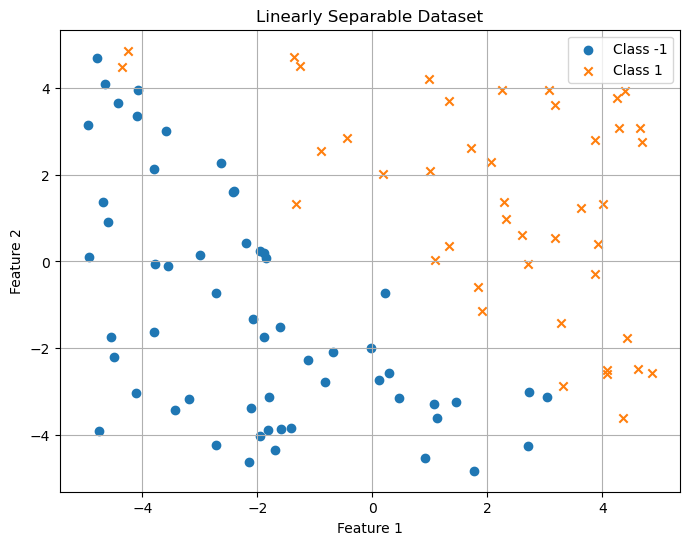

In [1]:
#below I have asked chatgpt to generate some simple data
import numpy as np
import matplotlib.pyplot as plt

# Generate random linearly separable dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 10 - 5  # Random points in [-5, 5] x [-5, 5]
y = np.sign(X[:, 0] + X[:, 1])  # Labels: -1 if x1 + x2 < 0, 1 otherwise

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class -1', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import cvxpy as cp
w = cp.Variable(2)
b = cp.Variable()

# Define objective function
obj = cp.Minimize(cp.norm(w, 2))

# Define constraints
constraints = [y[i] * (X[i] @ w + b) >= 1 for i in range(len(X))]

# Create problem instance and solve
prob = cp.Problem(obj, constraints)
prob.solve()



29.144389527248766

In [8]:
print(b.value, w.value)

0.9904434690370844 [20.61151333 20.60487707]


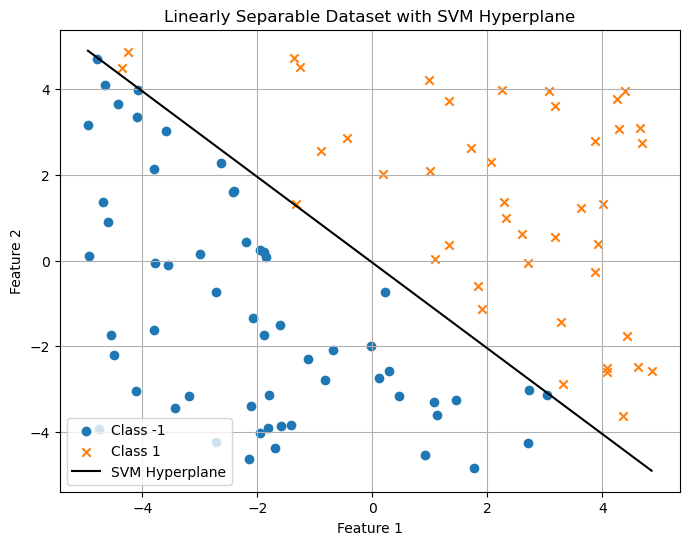

In [11]:
w = w.value
b = b.value
# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class -1', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

# Plot separating hyperplane
x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
x1 = np.linspace(x1_min, x1_max, 100)
x2 = (-w[0] * x1 - b) / w[1]  # Equation of hyperplane: w1*x1 + w2*x2 + b = 0
plt.plot(x1, x2, color='k', linestyle='-', label='SVM Hyperplane')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with SVM Hyperplane')
plt.legend()
plt.grid(True)
plt.show()

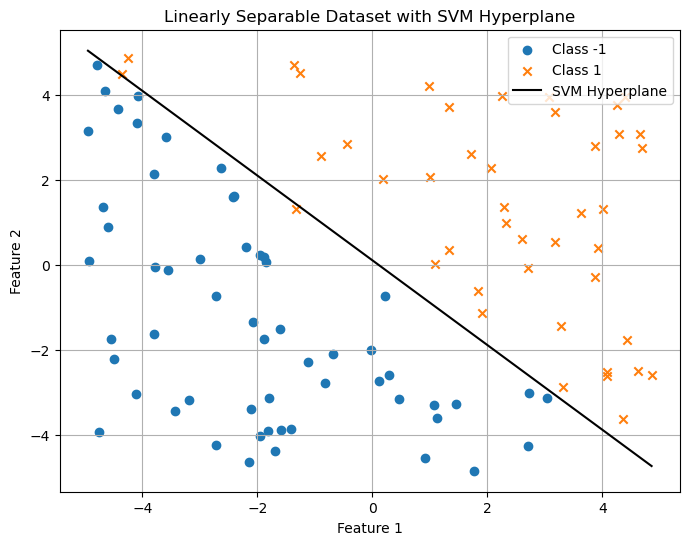

In [46]:
from sklearn.svm import LinearSVC

svc = LinearSVC().fit( X, y)

w = svc.coef_[0]
b = svc.intercept_

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class -1', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

# Plot separating hyperplane
x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
x1 = np.linspace(x1_min, x1_max, 100)
x2 = (-w[0] * x1 - b) / w[1]  # Equation of hyperplane: w1*x1 + w2*x2 + b = 0
plt.plot(x1, x2, color='k', linestyle='-', label='SVM Hyperplane')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with SVM Hyperplane')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
svc.score(X,y)

0.99

In [47]:
print(w)
print(cp.norm2(w).value)
print(b)

[1.37588916 1.38075941]
1.9492479420232571
[-0.15897956]


Both methods do a good job of seperating the data. However as  we can see the sklearn model is not a hard margin as it classified one 1% of the points wrong and since we have 100 points I can see they barely put the yeloow point on the blue side of the line. In our model this would violate the constraints we had set as in that case $y(w \cdot x + b  ) < 1$. However the sklearn.svm.LinearSVM  is a softer margin threshold which allows the model to misclassify items but intead they receive a penalty. If we also notice the values of the $\|\mathbf{w}\|$ the value for our approach is 29.144 where as the sklearn one is only 1.949 which is a much much lower value for only barely classifing one point wrong. 

**Soft Margin**

Utilizing the idea that real life data is not usually perfectly linearly seperable we can introduce the idea that our model can classify some points wrong but if they do they will recieve a penalty. 

The soft margin problem can be defined as 
minimize $ 1/2 \|\mathbf{w}\| + C \sum_{i=0}^{n} \max{(0, y(w \cdot x + b))}$

Lets try this with the default value of C=1 as an LP-problem 

In [61]:
w = cp.Variable(2)
b = cp.Variable()
C = 0.2
# Define objective function
obj = cp.Minimize(.5*cp.norm(w, 2) + C * cp.sum(cp.pos(1 - cp.multiply(y, X @ w + b))))

# Create problem instance and solve
prob = cp.Problem(obj)
prob.solve()


print(prob.value)
print(w.value, b.value)

2.1845434432094892
[1.43879707 1.36424316] -0.3385625804281408


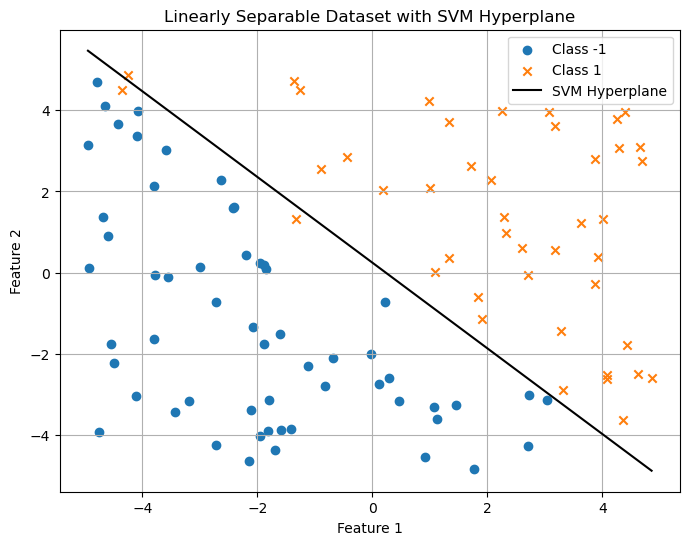

In [55]:
w = w.value
b = b.value
# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Class -1', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

# Plot separating hyperplane
x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
x1 = np.linspace(x1_min, x1_max, 100)
x2 = (-w[0] * x1 - b) / w[1]  # Equation of hyperplane: w1*x1 + w2*x2 + b = 0
plt.plot(x1, x2, color='k', linestyle='-', label='SVM Hyperplane')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with SVM Hyperplane')
plt.legend()
plt.grid(True)
plt.show()

As we can see in the plot above the new svm has incorrecltly placed 2 items. However with this soft margin we also see a large difference in the $\|\mathbf{w}\|$ value as the new value is 2.184 which is much less than 29.

**Other types of SVM's**
Linear SVM's are not the only type of SVM there are also other types of SVM's that utilize different `kernels`. In our case the kernel is simply the dot product of the X values, this can be written mathematically as $K(x_1,x_2) = {x_1}^T x_2$. The other types of kernels such as  polynomial and RBF where the RBF kernel is just a gaussian kernel. However these problems are quite a bit more complex to solve as the dual of the problem is typically solved by using a lagrangian multiplier method as opposed to the simple lp formulation which we could use with the linear kernel. 

**What I learned**

I learned how to format a SVM classifier as an linear programming problem , I  did try to understand how to format the problems with different kernels however due to their more complex structure I decided to just implementing a linear kernel would be the best option. SVM was a classifier that I had used in the past in machine leanring courses and it was intersting to see that lots of models like this are all just based on math !

